<a href="https://colab.research.google.com/github/yunusemremeral/yapay_zeka_makine_ogrenmesi/blob/main/Yapay_Zeka_%26_Makine_%C3%96%C4%9Frenmesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
#dependencies for analyze
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from keras import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor

import xgboost as xgb
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [214]:
#load the data

from google.colab import files
uploaded = files.upload()

Saving 3988.HK.csv to 3988.HK (3).csv


In [216]:
#Store the data into a data frame
df = pd.read_csv('3988.HK (3).csv')
df = df[-427:]
df.head(6)

,Date,Open,High,Low,Close
1545,11/04/2018,4.23,4.30,4.21,4.24
1546,12/04/2018,4.25,4.27,4.19,4.22
1547,13/04/2018,4.26,4.27,4.20,4.21
1548,16/04/2018,4.24,4.24,4.12,4.15
1549,17/04/2018,4.14,4.18,4.10,4.12
1550,18/04/2018,4.19,4.21,4.13,4.15


In [217]:
#Get the number of trading days
df.shape

(427, 5)

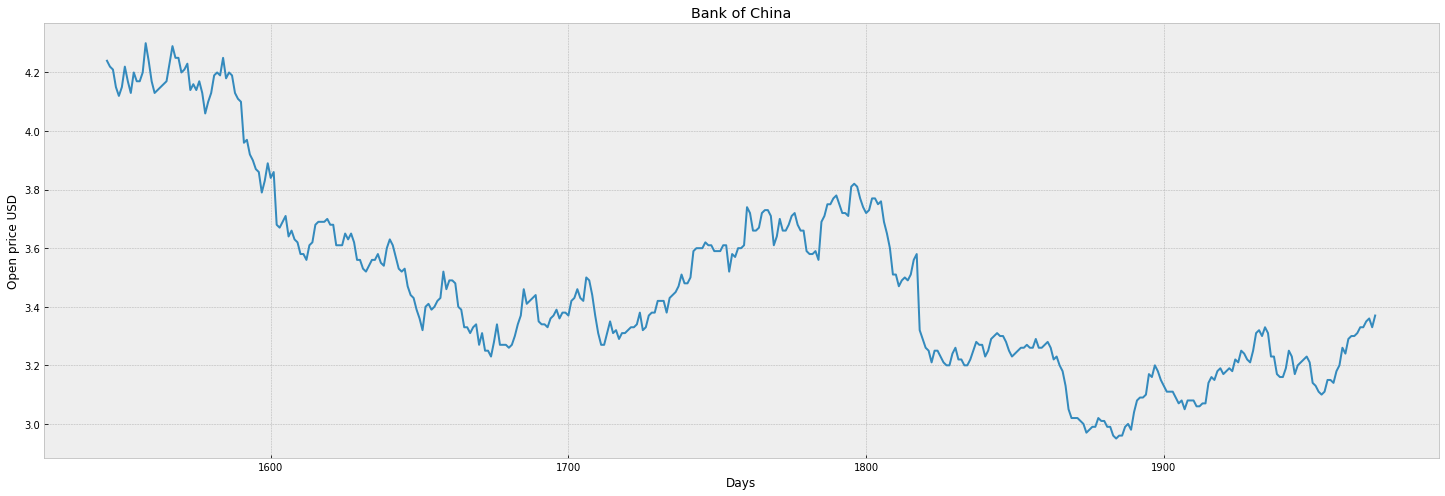

In [218]:
#Visualize the close price data
plt.figure(figsize=(25,8))
plt.title('Bank of China')
plt.xlabel('Days')
plt.ylabel('Open price USD')
plt.plot(df['Close'])
plt.show()

In [219]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
1545,4.24
1546,4.22
1547,4.21
1548,4.15


In [233]:
#Create a variable to predict 'x' days out into the future
future_days=30

#Creat a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
1968,3.35,NaN
1969,3.36,NaN
1970,3.33,NaN
1971,3.37,NaN


In [234]:
#Create the feature data set x and convert it to a numpy array and remove the last x rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[4.24]
 [4.22]
 [4.21]
 [4.15]
 [4.12]
 [4.15]
 [4.22]
 [4.17]
 [4.13]
 [4.2 ]
 [4.17]
 [4.17]
 [4.2 ]
 [4.3 ]
 [4.24]
 [4.17]
 [4.13]
 [4.14]
 [4.15]
 [4.16]
 [4.17]
 [4.23]
 [4.29]
 [4.25]
 [4.25]
 [4.2 ]
 [4.21]
 [4.23]
 [4.14]
 [4.16]
 [4.14]
 [4.17]
 [4.13]
 [4.06]
 [4.1 ]
 [4.13]
 [4.19]
 [4.2 ]
 [4.19]
 [4.25]
 [4.18]
 [4.2 ]
 [4.19]
 [4.13]
 [4.11]
 [4.1 ]
 [3.96]
 [3.97]
 [3.92]
 [3.9 ]
 [3.87]
 [3.86]
 [3.79]
 [3.83]
 [3.89]
 [3.84]
 [3.86]
 [3.68]
 [3.67]
 [3.69]
 [3.71]
 [3.64]
 [3.66]
 [3.63]
 [3.62]
 [3.58]
 [3.58]
 [3.56]
 [3.61]
 [3.62]
 [3.68]
 [3.69]
 [3.69]
 [3.69]
 [3.7 ]
 [3.68]
 [3.68]
 [3.61]
 [3.61]
 [3.61]
 [3.65]
 [3.63]
 [3.65]
 [3.62]
 [3.56]
 [3.56]
 [3.53]
 [3.52]
 [3.54]
 [3.56]
 [3.56]
 [3.58]
 [3.55]
 [3.54]
 [3.6 ]
 [3.63]
 [3.61]
 [3.57]
 [3.53]
 [3.52]
 [3.53]
 [3.47]
 [3.44]
 [3.43]
 [3.39]
 [3.36]
 [3.32]
 [3.4 ]
 [3.41]
 [3.39]
 [3.4 ]
 [3.42]
 [3.43]
 [3.52]
 [3.46]
 [3.49]
 [3.49]
 [3.48]
 [3.4 ]
 [3.39]
 [3.33]
 [3.33]
 [3.31]
 [3.33]
 [3.34]


In [236]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last x rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[4.14 4.17 4.13 4.06 4.1  4.13 4.19 4.2  4.19 4.25 4.18 4.2  4.19 4.13
 4.11 4.1  3.96 3.97 3.92 3.9  3.87 3.86 3.79 3.83 3.89 3.84 3.86 3.68
 3.67 3.69 3.71 3.64 3.66 3.63 3.62 3.58 3.58 3.56 3.61 3.62 3.68 3.69
 3.69 3.69 3.7  3.68 3.68 3.61 3.61 3.61 3.65 3.63 3.65 3.62 3.56 3.56
 3.53 3.52 3.54 3.56 3.56 3.58 3.55 3.54 3.6  3.63 3.61 3.57 3.53 3.52
 3.53 3.47 3.44 3.43 3.39 3.36 3.32 3.4  3.41 3.39 3.4  3.42 3.43 3.52
 3.46 3.49 3.49 3.48 3.4  3.39 3.33 3.33 3.31 3.33 3.34 3.27 3.31 3.25
 3.25 3.23 3.28 3.34 3.27 3.27 3.27 3.26 3.27 3.3  3.34 3.37 3.46 3.41
 3.42 3.43 3.44 3.35 3.34 3.34 3.33 3.36 3.37 3.39 3.36 3.38 3.38 3.37
 3.42 3.43 3.46 3.43 3.42 3.5  3.49 3.44 3.37 3.31 3.27 3.27 3.31 3.35
 3.31 3.32 3.29 3.31 3.31 3.32 3.33 3.33 3.34 3.38 3.32 3.33 3.37 3.38
 3.38 3.42 3.42 3.42 3.38 3.43 3.44 3.45 3.47 3.51 3.48 3.48 3.5  3.59
 3.6  3.6  3.6  3.62 3.61 3.61 3.59 3.59 3.59 3.61 3.61 3.52 3.58 3.57
 3.6  3.6  3.61 3.74 3.72 3.66 3.66 3.67 3.72 3.73 3.73 3.71 3.61 3.64
 3.7  

In [237]:
#Split the data into %80 training and %20 testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [238]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)
#knn
clf = xgb.XGBClassifier()
clf.fit(
    x_train,
    y_train,
)

XGBClassifier(objective='multi:softprob')

In [239]:
#Get the last x rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[3.06],
       [3.07],
       [3.07],
       [3.14],
       [3.16],
       [3.15],
       [3.18],
       [3.19],
       [3.17],
       [3.18],
       [3.19],
       [3.18],
       [3.22],
       [3.21],
       [3.25],
       [3.24],
       [3.22],
       [3.21],
       [3.25],
       [3.31],
       [3.32],
       [3.3 ],
       [3.33],
       [3.31],
       [3.23],
       [3.23],
       [3.17],
       [3.16],
       [3.16],
       [3.19]])

In [240]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[3.22       3.23666667 3.23666667 3.225      3.285      3.215
 3.1775     3.23       3.23333333 3.1775     3.23       3.1775
 3.1825     3.2175     3.21875    3.13666667 3.1825     3.2175
 3.21875    3.54       3.44       3.108      3.35       3.54
 3.245      3.245      3.23333333 3.285      3.285      3.23      ]

[3.15346282 3.1595896  3.1595896  3.20247708 3.21473065 3.20860387
 3.22698422 3.233111   3.22085743 3.22698422 3.233111   3.22698422
 3.25149135 3.24536457 3.2698717  3.26374492 3.25149135 3.24536457
 3.2698717  3.3066324  3.31275918 3.30050562 3.31888597 3.3066324
 3.25761813 3.25761813 3.22085743 3.21473065 3.21473065 3.233111  ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


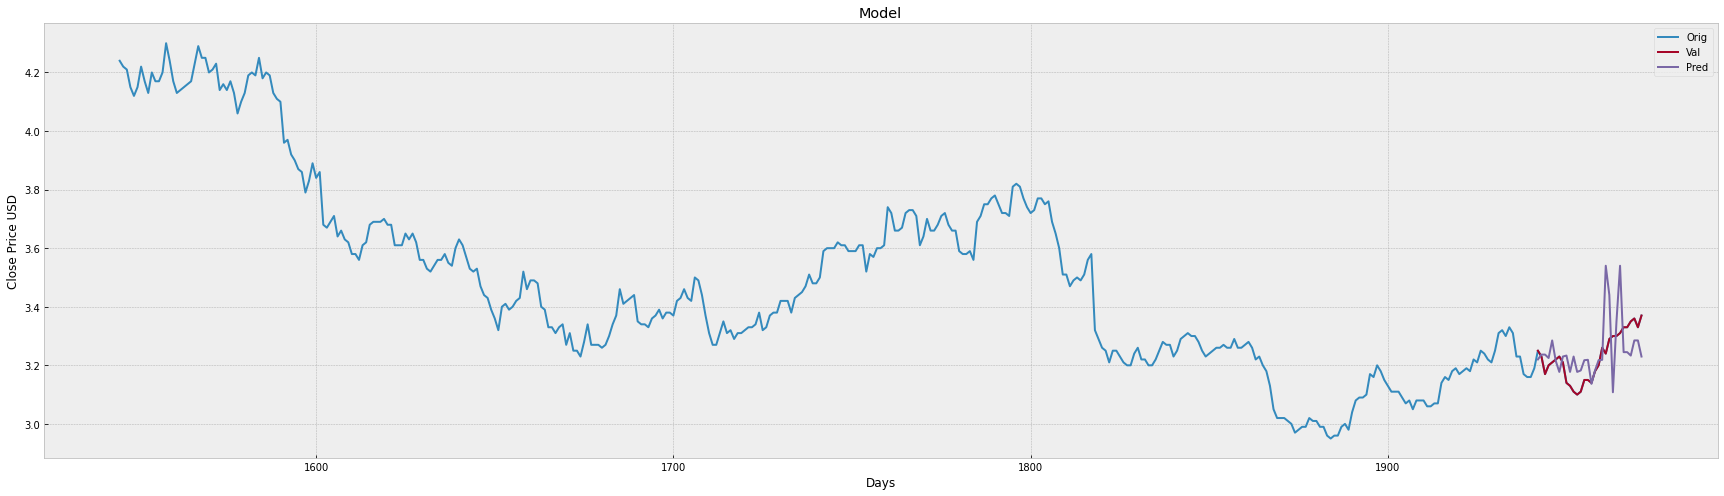

In [241]:
#Visualize the data
tree_pred = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = tree_pred
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

reel_data = (df['Close'])[-future_days:]

tree_regressor_mse = mean_squared_error(tree_pred, reel_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


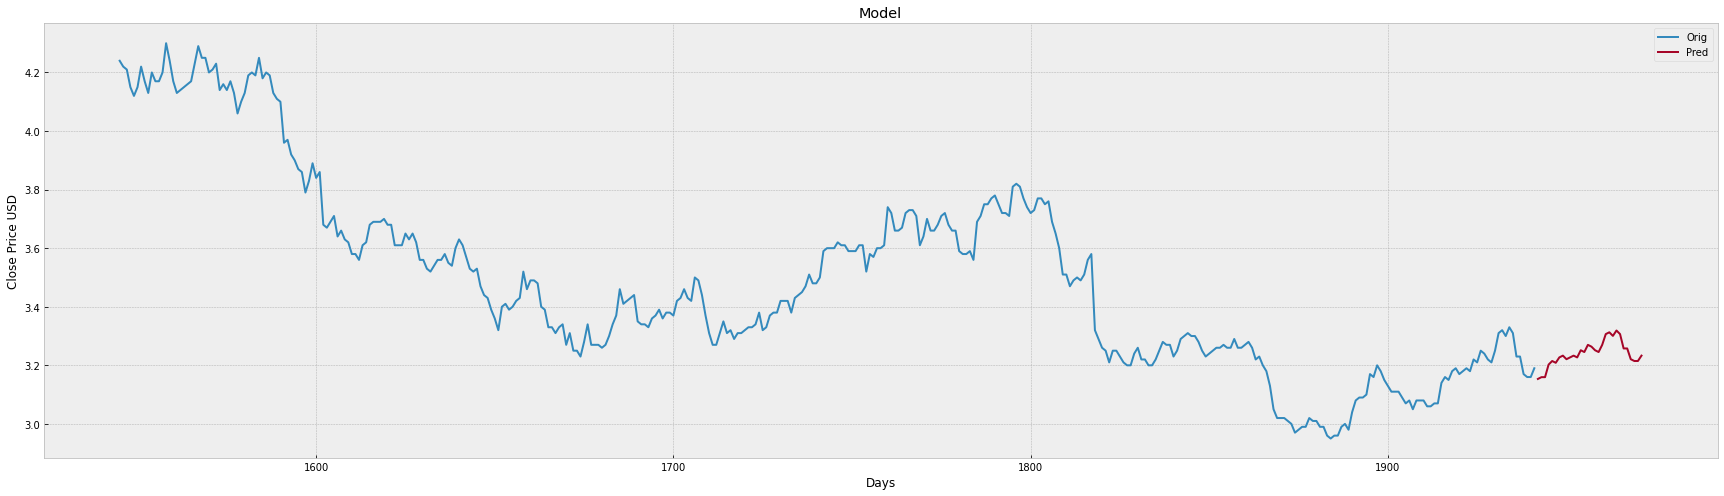

In [342]:
#Visualize the data
lineer_pred = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = lineer_pred
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(((df['Close'])[:-future_days]))
plt.plot(valid[['Predictions']])
plt.legend(['Orig', 'Pred'])
plt.show()
reel_data = (df['Close'])[-future_days:]

lr_mse = mean_squared_error(lineer_pred, reel_data)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=30,shuffle=False,)

In [160]:
model = Sequential()
model.add(LSTM(1,activation='relu',input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse", metrics=["acc"])
model.summary()
model.fit(X_train[:, :, np.newaxis], y_train, epochs=100)
lstm_y_pred = model.predict(X_test[:, :, np.newaxis])
lstm_rmse = mean_squared_error(y_test, lstm_y_pred)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1)                 12        
                                                                 
 dense_27 (Dense)            (None, 1)                 2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 8.9097 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 8.8880 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 8.8655 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 8.8421 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 2ms/s

In [161]:
model = Sequential()
model.add(Dense(12, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X_train, y_train, epochs=100)
dnn_y_pred = model.predict(X_test)
dnn_rmse = mean_squared_error(y_test, dnn_y_pred)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6590 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: -0.0046 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: -0.5881 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: -1.0039 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: -1.4171 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: -1.8651 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: -2.3479 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: -2.8735 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: -3.4557 - acc: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: -4.0900 - acc: 0.0000e+00
Epoch 11/1

In [162]:
model = Sequential()
model.add(GRU(1, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X_train[:, :, np.newaxis], y_train, epochs=100)
gru_y_pred = model.predict(X_test[:, :, np.newaxis])
gru_rmse = mean_squared_error(y_test, gru_y_pred)

Epoch 1/100
10/10 [==============================] - 2s 2ms/step - loss: 0.7135 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6790 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6450 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6117 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5789 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5465 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5145 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4829 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4516 - acc: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4205 - acc: 0.0000e+00
Epoch 11/100
10/10 

In [163]:
model = Sequential()
model.add(SimpleRNN(1, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.fit(X_train[:, :, np.newaxis], y_train, epochs=100)
simplernn_y_pred = model.predict(X_test[:, :, np.newaxis])
srnn_rmse = mean_squared_error(y_test, simplernn_y_pred)


Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: -2.3662 - acc: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: -2.4209 - acc: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: -2.4758 - acc: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: -2.5303 - acc: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: -2.5848 - acc: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: -2.6391 - acc: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: -2.6934 - acc: 0.0000e+00
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: -2.7476 - acc: 0.0000e+00
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: -2.8015 - acc: 0.0000e+00
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: -2.8556 - acc: 0.0000e+00
Epoch 11/

In [164]:

clf = xgb.XGBClassifier()
clf.fit(X_train,y_train,)
xgb_y_pred = clf.predict(X_test)
xg_rmse = mean_squared_error(y_test, xgb_y_pred)

In [165]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train,)
rfr_y_pred = clf.predict(X_test)
rf_rmse = mean_squared_error(y_test, rfr_y_pred)

In [166]:
clf = make_pipeline(StandardScaler(), SVR(gamma="auto"))
clf.fit(
   X_train,
   y_train,
)
svr_y_pred = clf.predict(X_test)
svr_rmse = mean_squared_error(y_test, svr_y_pred)

In [167]:
clf = make_pipeline(StandardScaler(), MLPRegressor(random_state=0, shuffle=False))
clf.fit(
   X_train,
   y_train,
)
multi_layer_perc_pred = clf.predict(X_test)
mlp_rmse = mean_squared_error(y_test, multi_layer_perc_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [168]:
clf = BaggingRegressor(random_state=0)
clf.fit(
   X_train,
   y_train,
)
bag_y_pred = clf.predict(X_test)
br_rmse = mean_squared_error(y_test, bag_y_pred)

In [290]:
print("LSTM - MSE: %f" % (lstm_rmse))
print("XGBoost - MSE: %f" % (xg_rmse))
print("RandomForest - MSE: %f" % (rf_rmse))
print("DNN - MSE: %f" % (dnn_rmse))
print("Gated recurrent unit - MSE: %f" % (gru_rmse))
print("Simple Recurrent Neural Networks - MSE: %f" % (srnn_rmse))
print("Support Vector Regression - MSE: %f" % (svr_rmse))
print("Multilayer Perceptron - MSE: %f" % (mlp_rmse))
print("Bagging - MSE: %f" % (br_rmse))
print("Tree regressor - MSE: %f" % (tree_regressor_mse))
print("Lineer regressor - MSE: %f" % (lr_mse))




LSTM - MSE: 4.537990
XGBoost - MSE: 0.021640
RandomForest - MSE: 0.017851
DNN - MSE: 4.490813
Gated recurrent unit - MSE: 4.841609
Simple Recurrent Neural Networks - MSE: 4.688885
Support Vector Regression - MSE: 0.007121
Multilayer Perceptron - MSE: 0.838031
Bagging - MSE: 0.017688
Tree regressor - MSE: 0.010761
Lineer regressor - MSE: 0.007133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


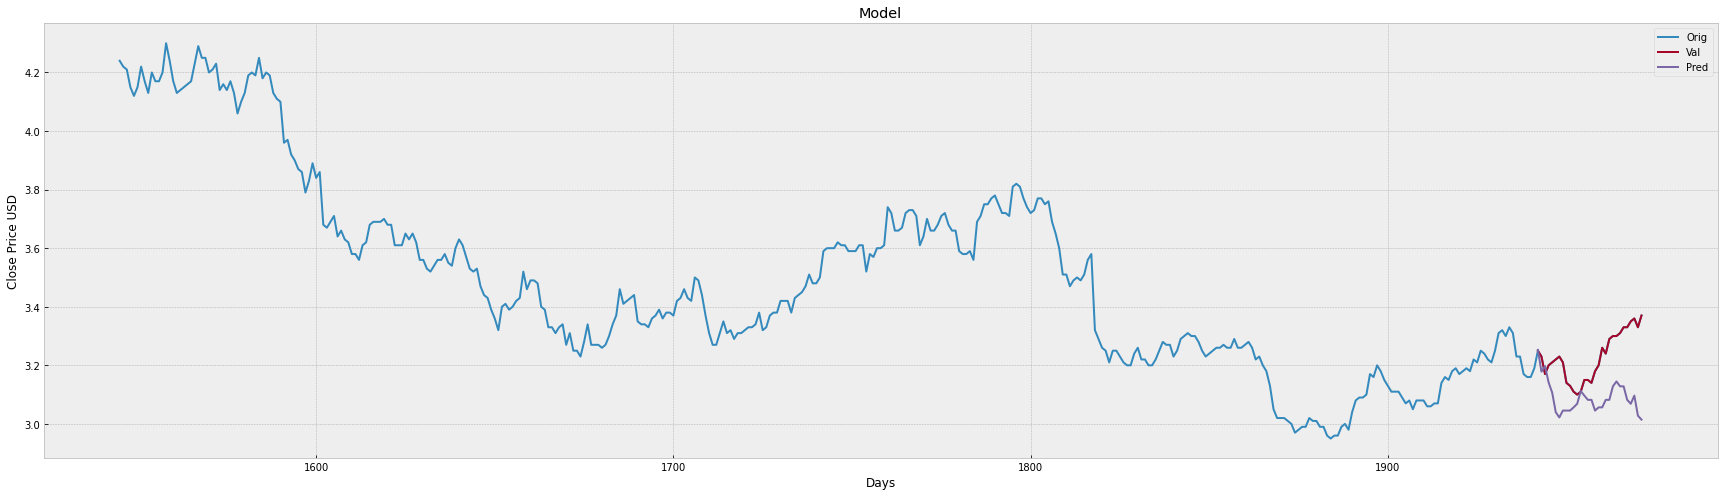

In [316]:
#Support Vector Regression

valid = df[X.shape[0]:]
valid['Predictions'] = svr_y_pred
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


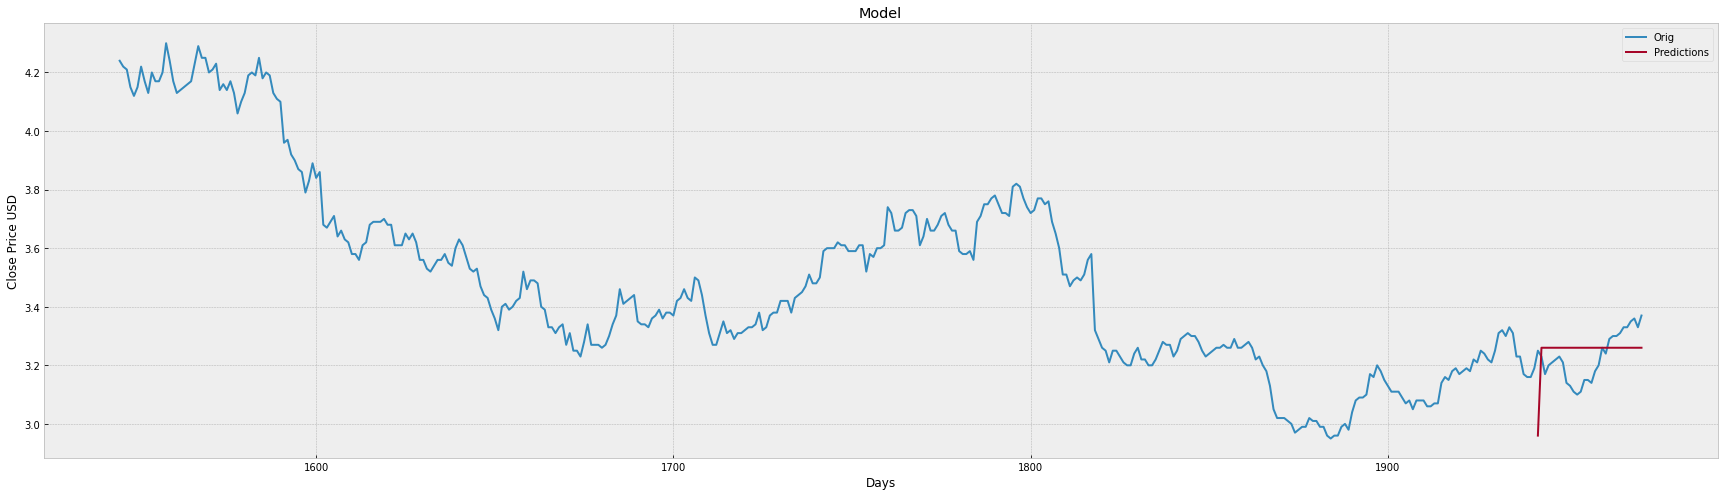

In [278]:
#XGBoost show predictions

valid = df[X.shape[0]:]
valid['Predictions'] = xgb_y_pred
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Orig', 'Predictions'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


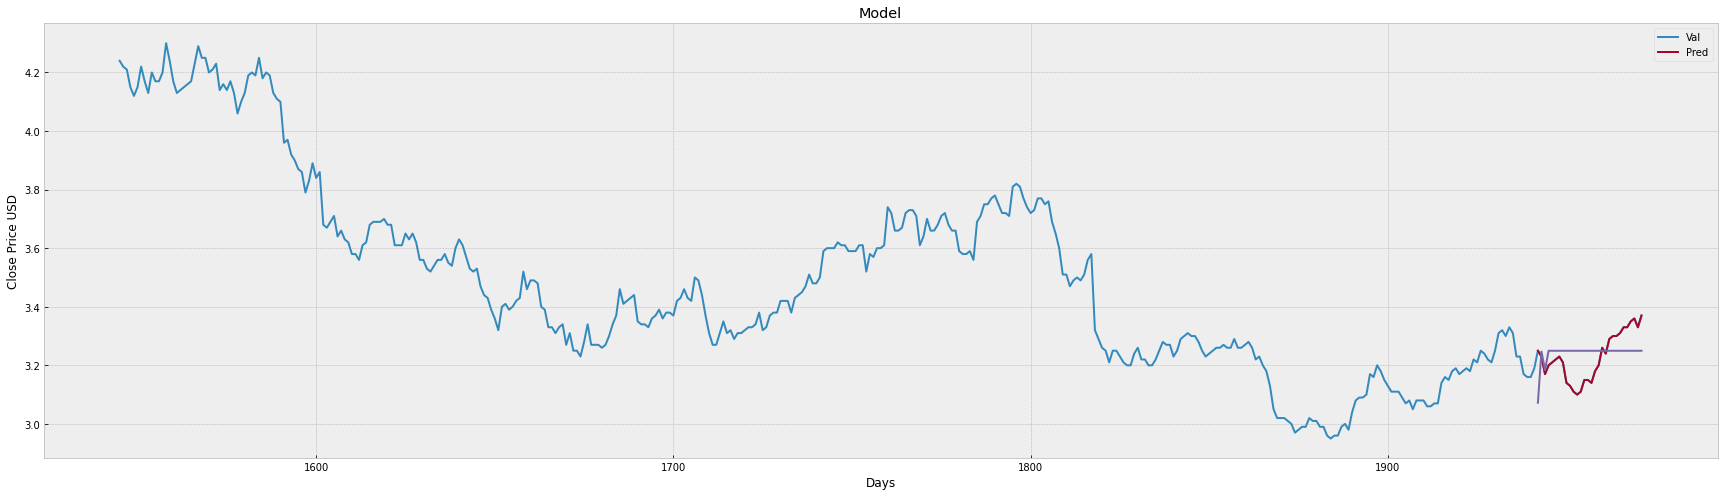

In [283]:
#Random Forest

valid = df[X.shape[0]:]
valid['Predictions'] = rfr_y_pred
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


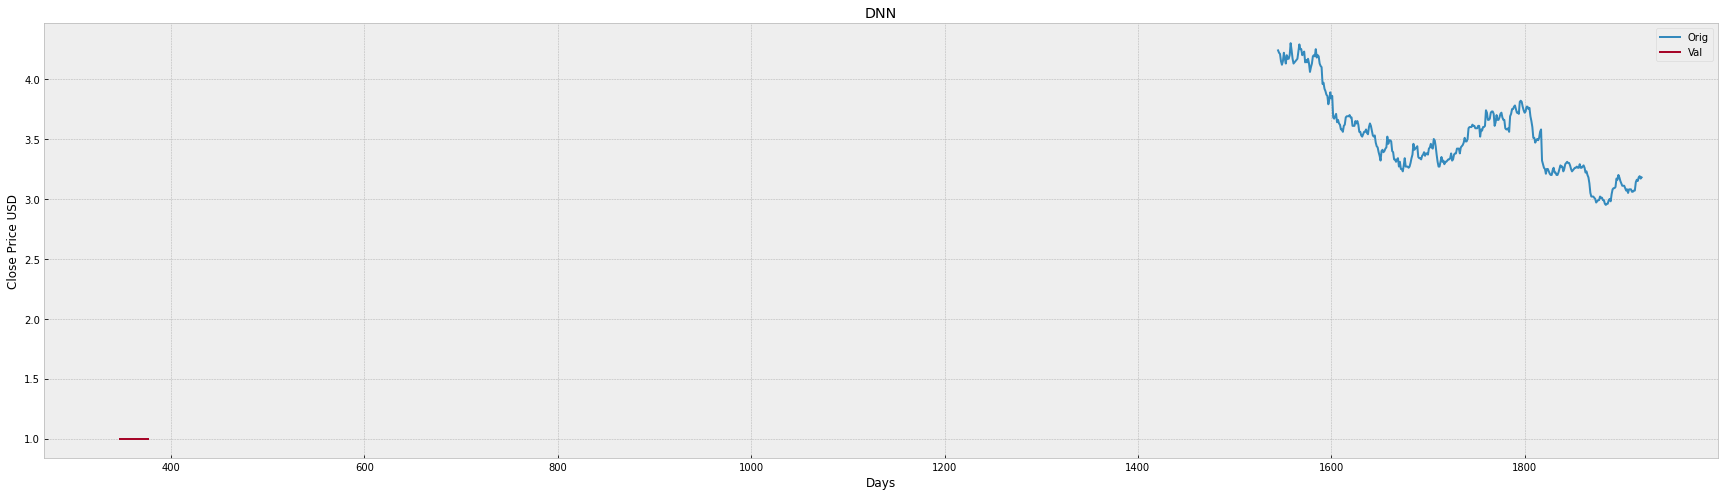

In [177]:
#DNN 
valid = df[X.shape[0]:]
l = [None] * int(len(df)-30)
l.extend(dnn_y_pred)
plt.figure(figsize=(30,8))
plt.title('DNN')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(l)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [ ]:
#Gated recurrent unit
valid = df[X.shape[0]:]
valid['Predictions'] = gru_y_pred
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [ ]:
#SRNN
valid = df[X.shape[0]:]
l = [None] * int(len(df)-30)
l.extend(srnn_y_pred)
plt.figure(figsize=(30,8))
plt.title('Simple Recurrent Neural Network')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(l)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


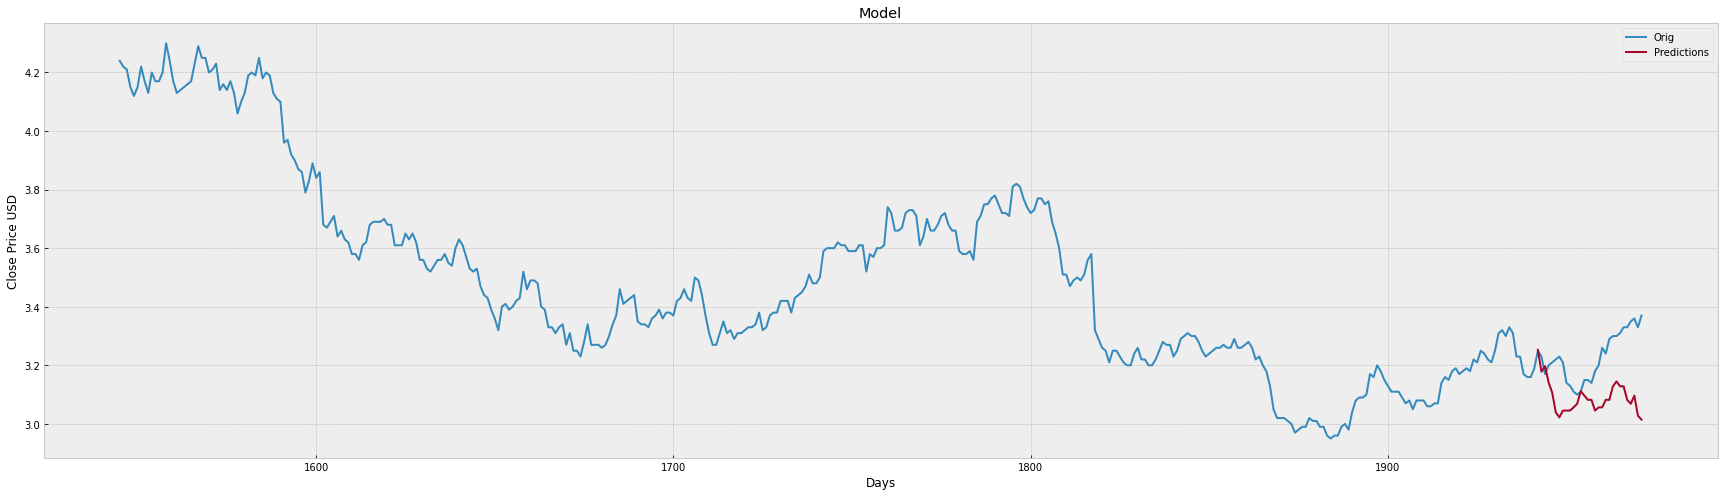

In [282]:
#Support Vector Regression
valid = df[X.shape[0]:]
valid['Predictions'] = svr_y_pred
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Orig', 'Predictions'])
plt.show()

In [ ]:
#Multilayer Perceptiom
valid = df[X.shape[0]:]
l = [None] * int(len(df)-len(df)*0.1)
l.extend(multi_layer_perc_pred)
plt.figure(figsize=(30,8))
plt.title('MLP')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(l)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

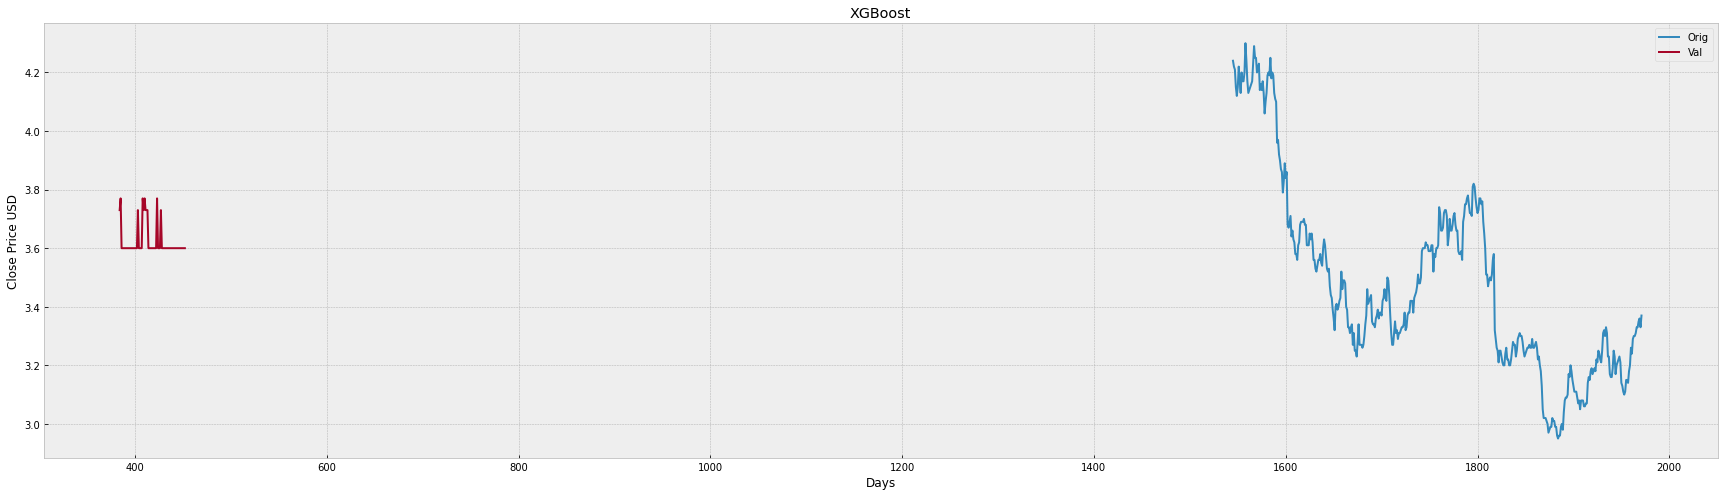

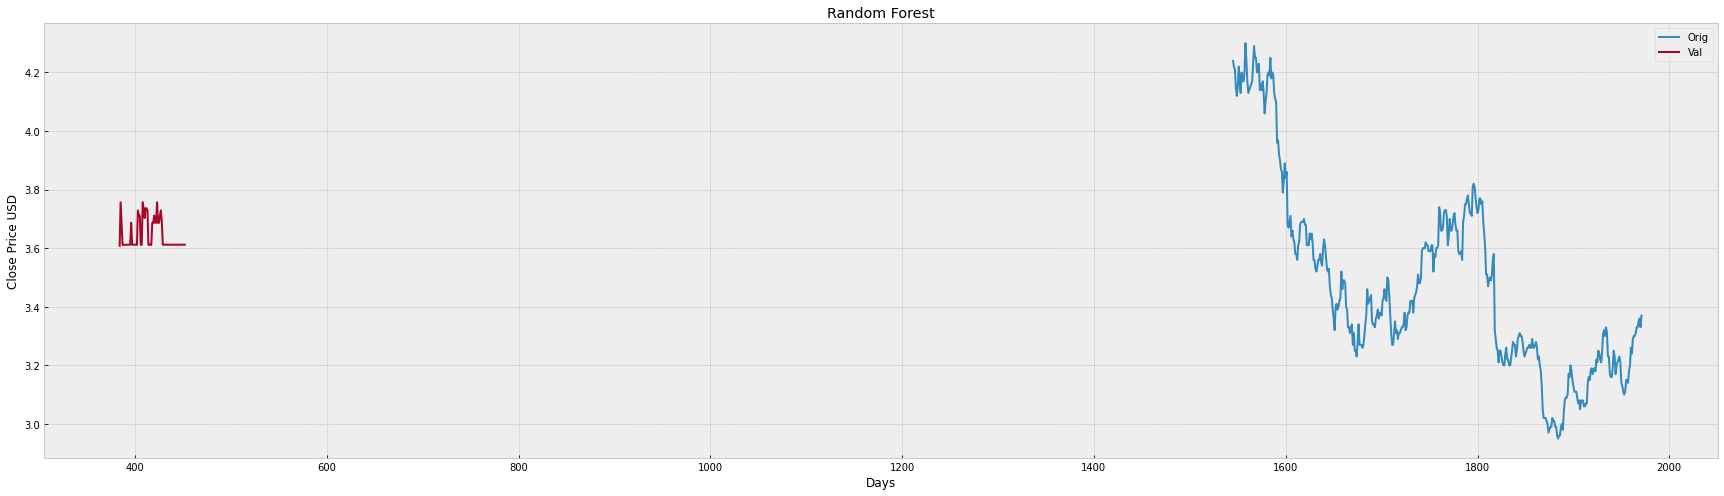

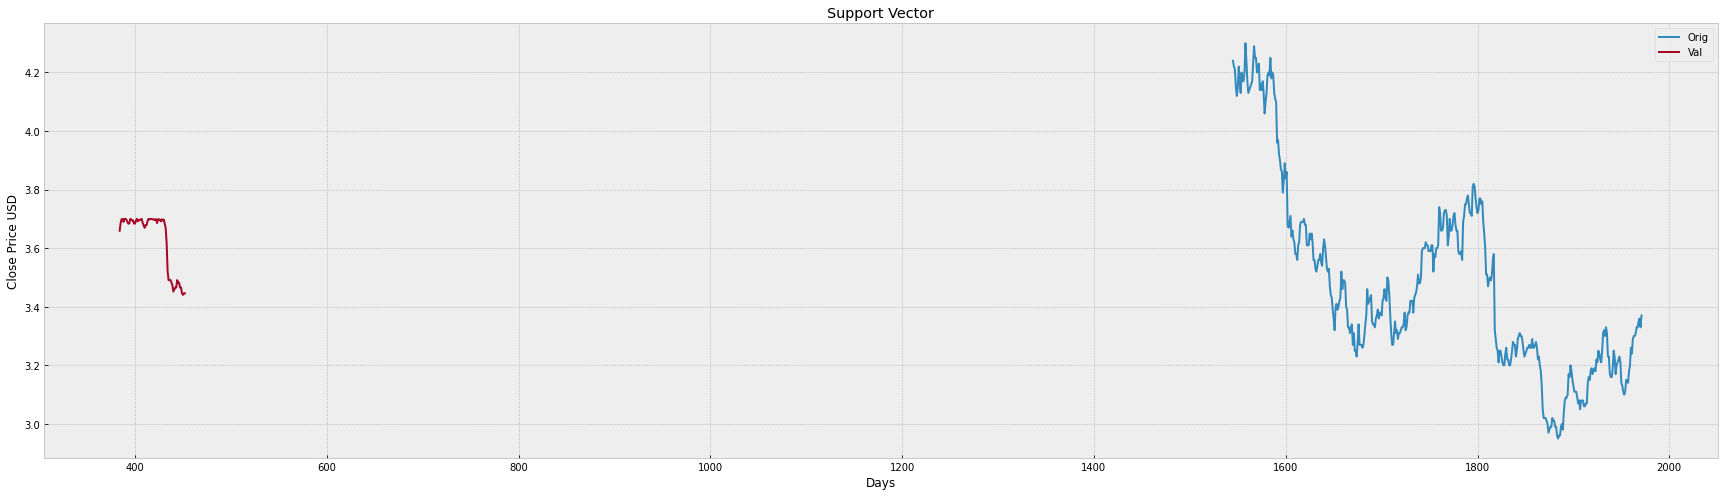

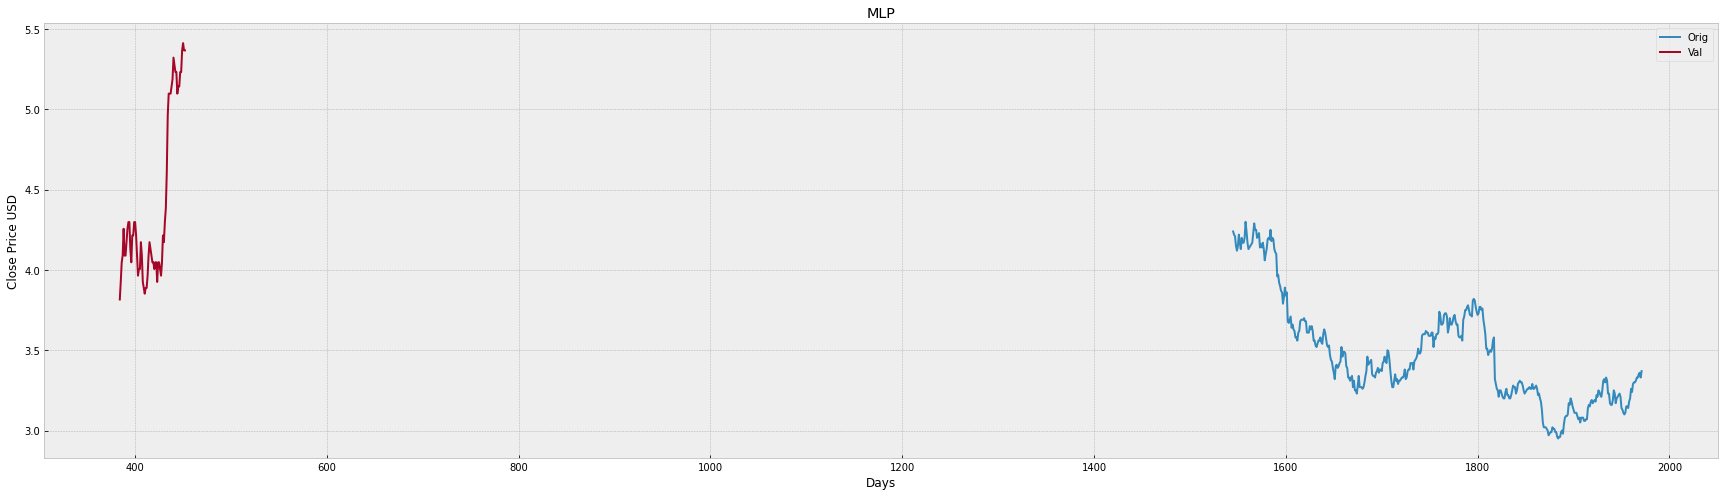

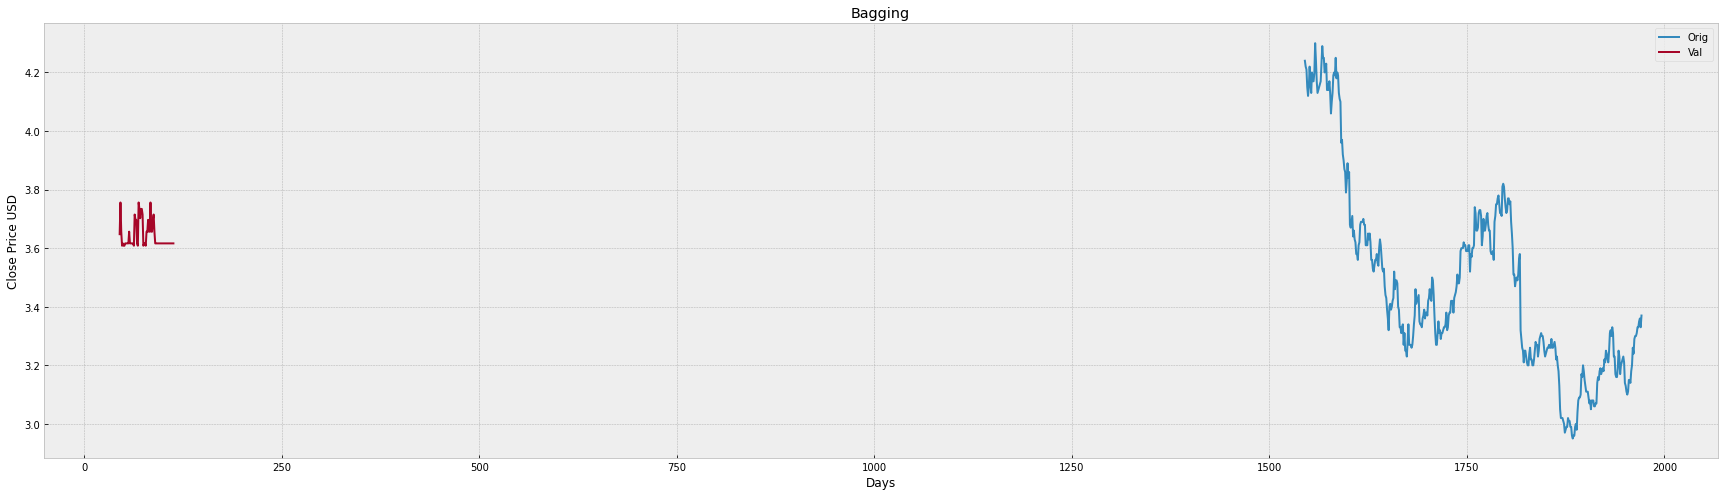

In [ ]:
#Bagging
valid = df[X.shape[0]:]
l = [None] * 45
l.extend(bag_y_pred)
plt.figure(figsize=(30,8))
plt.title('Bagging')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(l)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

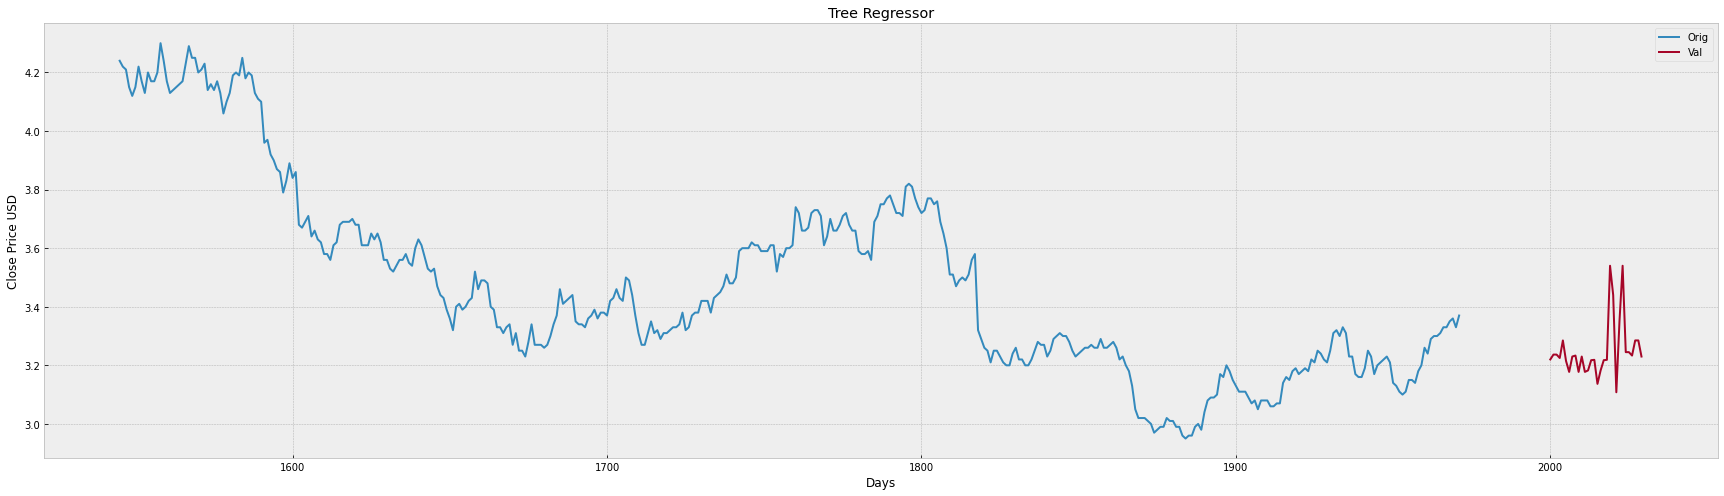

In [281]:
#Tree Regressor
valid = df[X.shape[0]:]
l = [None] * 2000
l.extend(tree_pred)
plt.figure(figsize=(30,8))
plt.title('Tree Regressor')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(l)
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


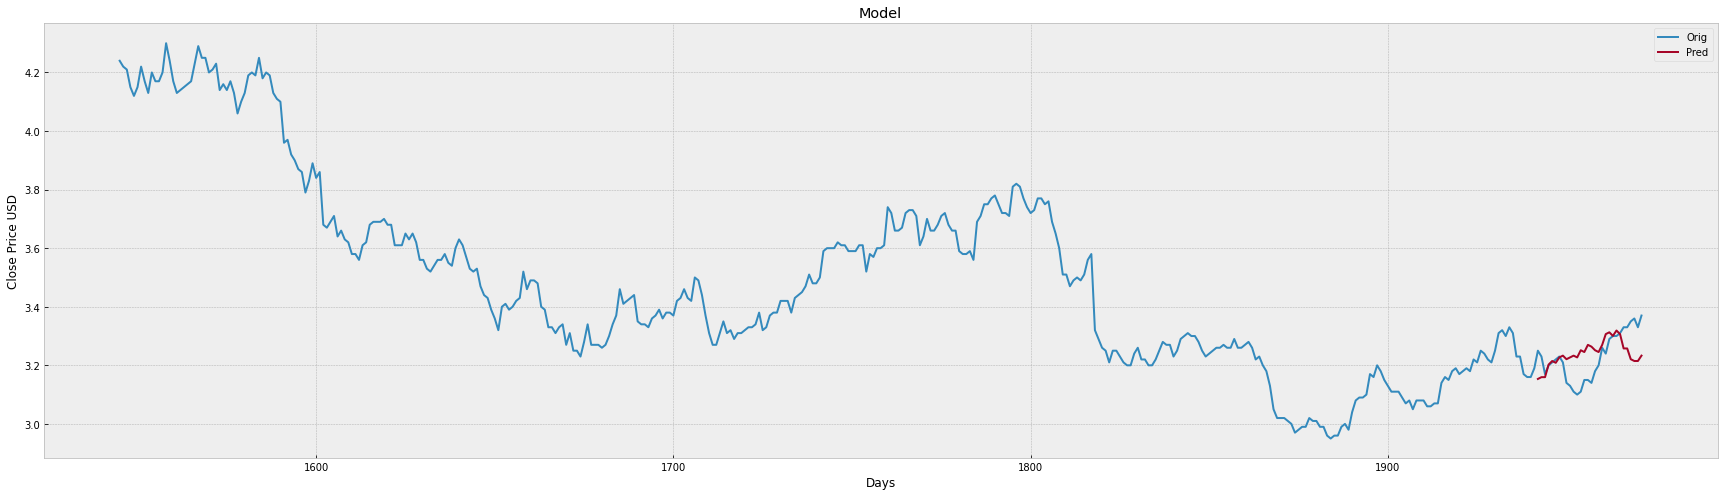

In [325]:
#Lineer Regressor
valid = df[X.shape[0]:]
valid['Predictions'] = lineer_pred
test = (valid[['Predictions']])
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(test)
plt.legend(['Orig','Pred'])
plt.show() 


